In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

In [8]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

logreg = LogisticRegression().fit(X_train, y_train)
print ('test set score{:.2f}'.format(logreg.score(X_test, y_test)))

test set score0.88


In [ ]:
# 이번장의 목표
# 일반화 성능 측정 방법인 교차검증
# score 메써드가 제공하는 정확도와 R**2 값 이외에 분류와 회귀성능을 측정하는 다른 방법

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

# 5.1 교차검증(Cross_validation)

- 가장 널리 사용되는 방법 K-fold cross-validation
- 먼저 fold를 나눠야함(비슷한 크기의 부분집합, 나누는 갯수 K)
- 5개가 생성됬다고 하면 1번은 테스트 셋, 2-5번은 트레인 셋으로 사용, 평가
- 이런 식으로 5번 반복
- moder_selection 모듈의 cross_val_score를 사용함

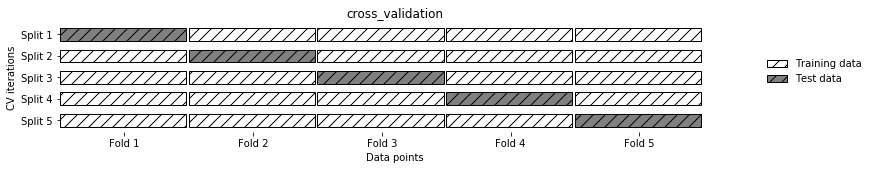

In [11]:
mglearn.plots.plot_cross_validation()

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)
# cross_val_score의 변수는 3개가 들어감 : 사용할 모델 / 데이터 셋 / 타겟 셋
print ('cross_val_score {}'.format(scores))
# cross_val_score의 k dafault 는 3임.
# cv = num 변수를 통해서 k값을 변경 할 수 있음

cross_val_score [ 0.96078431  0.92156863  0.95833333]


In [15]:
# 보통 스코어의 평균을 사용함
scores = cross_val_score(logreg, iris.data, iris.target, cv = 5)
print ('k=5 scores {:.2f}'.format(scores.mean()))

k=5 scores 0.96


## 교차 검증의 장점

- train_test_split을 하더라도 경우에 따라선 데이터들이 몰릴 수가 있따
    - 즉 어느 경우엔 테스트가 잘나오고 어느때엔 트레인이 잘 나오는 등의 경우가 발생 가낭
- 교차 검증의 경우 테스트셋이 폴드마다 들어가기때문에 모델이 데이터 전체에 적합화 될 수 있음
- 분할을 한번 했을때보다 더 효과적으로 사용 할 수 있다.
    - train_test_split의 경우 75%(디폴트)를 사용하나 k-fold의 경우 더 다양하게 활용이 가능함
- 다만 연산비용이 늘어남
- k-fold는 score를 계산할 뿐 최적의 모델을 뽑아내는 함수가 아님

- cross_val_predict 함ㅅ를 사용하면 교차검증으로 만든 예측값을 구할 수 있다
    - 무슨말이지

In [16]:
print ('iris ravel {}'.format(iris.target))
# 이 경우 순서대로 레이블이 나뉘어져 있다.
# 이런경우엔 k를 3으로 둔다면 모든 경우에 정확도가 0이 나온다 => 알맞은 방법이 아니다
# 계층별 교차검증을 사용하면 된다

iris ravel [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


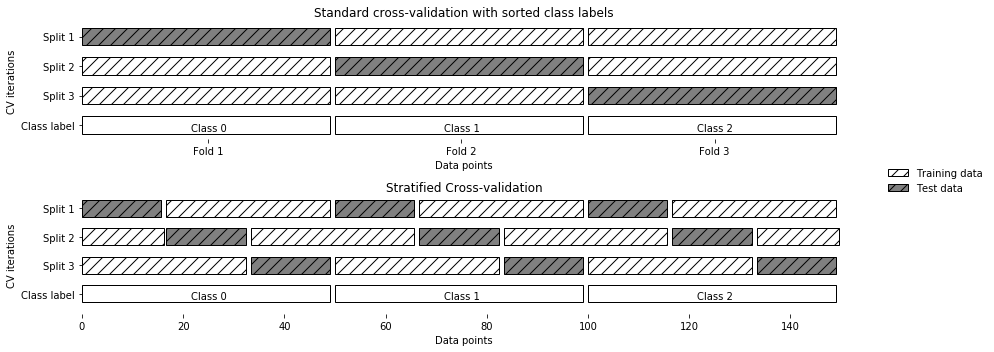

In [17]:
mglearn.plots.plot_stratified_cross_validation()

In [19]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5)

print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))
# cross val socre의 경우 cv 파라미터는 단순히 k개의 갯수만을 뜻했다
# cross val score은 회귀에는 kfold, 분류에는 stratifiedKfold를 사용한다.
# 만약 분류모델에서 kfold를 사용하고 싶다면? - cv값에 kfold 객체 값을 넣어준다.

cross val score [ 1.          0.93333333  0.43333333  0.96666667  0.43333333]


In [21]:
kfold = KFold(n_splits = 3)
print ('cross val score{}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))
print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = 3)))
# iris는 분류 문제이게 때문에 StratifiedKFold를 사용함. 
# 따라서 같은 cv = 3이라 하더라도 결과가 다르다
# k-fold를 사용하면서 Stratified 처럼의 효과를 주고 싶으면 kfold의 shuffle 매개변수를 지정해주자 : True로

cross val score[ 0.  0.  0.]
cross val score [ 0.96078431  0.92156863  0.95833333]


In [23]:
from sklearn.model_selection import StratifiedKFold
kk = StratifiedKFold(n_splits = 3)
print ('cross_val_score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kk)))

cross_val_score [ 0.96078431  0.92156863  0.95833333]


In [25]:
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42) # 랜덤스테이트 설정해줘야 같은 조건이 유지됨
print ('cross val score {}'.format(cross_val_score(logreg, iris.data, iris.target, cv = kfold)))

cross val score [ 1.    0.92  1.  ]


## 또 다른 교차검증 방법인 LOOCV(Leave One Out Cross Validation)

- 폴드 하나에 샘플 하나만 들어있는 K-겹 교차 검증임
    - 무슨말일
   

In [26]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv = loo)
print ('cross val count : ', len(scores))
print ('scores.mean {:.2f}'.format(scores.mean()))

cross val count :  150
scores.mean 0.95


## 임의 분할 교차 검증 : shuffle-split cross validation

- train)size 만큼의 포인트로 훈련세트를 만들고 test size만큼의 포인트로 (훈련세트와 중첩되지 않은) 테스트 세트를 만들도록 분할
- 분할 횟수는 n_splits 횟수 만큼 반복된다.
- 무슨말인지 모르겠다.
- 포인트가 뭐지.

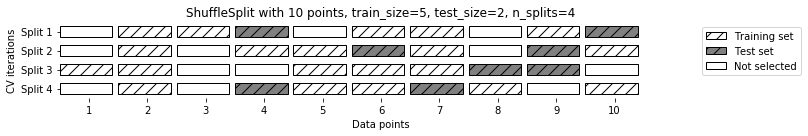

In [28]:
mglearn.plots.plot_shuffle_split()
# 샘플이 10개인 데이터셋을 5개 포인트의 훈련세트, 2개 포인트의 테스트 세트로 4번 반복하여 나누는 것을 보여준다.
# train_size, test_size에 정수 입력시 데이터 포인트의 절대 개수를 의미하고 실수를 입혁하면 전체 데이터에서의 비율을 나타낸다

In [31]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size =.5, train_size = .5, n_splits = 10) #비율을 주기 위해서 실수값으로 입력함
scores = cross_val_score(logreg, iris.data, iris.target, cv = shuffle_split)
print ('cross val score \n{}'.format(scores))

cross val score 
[ 0.96        0.93333333  0.96        0.96        0.92        0.98666667
  0.94666667  0.93333333  0.98666667  0.97333333]


- 임의 분할 교차 검증은 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절 할 때 유용
- train_size, test_size를 전체와 다르게 할 수 있다 = 전체 데이터에서 일부만 사용 가능(부분 샘플링)
- Shufflespit의 계층별 버젼으로 분류 작업에 더 적합한 StraifiedShuffleSpit도 있다.